Pokémon Data Analysis as my Project on Zero to Pandas Course <br>Copyright (C) 2020 Wagner Bertholdo Burghausen <br><https://github.com/wagner-b>, <wagb2b2@gmail.com> <br> <br>This program is free software: you can redistribute it and/or modify <br>it under the terms of the GNU General Public License as published by <br>the Free Software Foundation, either version 3 of the License, or <br>(at your option) any later version. <br> <br>This program is distributed in the hope that it will be useful, <br>but WITHOUT ANY WARRANTY; without even the implied warranty of <br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the <br>GNU General Public License for more details. <br> <br>You should have received a copy of the GNU General Public License <br>along with this program.  If not, see <https://www.gnu.org/licenses/>. <br>

# Pokémon data analysis

In this project I will analyze Pokémon data from [The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon), hosted on [Kaggle](https://www.kaggle.com). Pokémon is a very popular franchise of video games, anime and manga. Aside from playing the video games, watching the anime, and reading the manga, you can learn more about Pokémon on [Pokémon's Wikipedia website](https://en.wikipedia.org/wiki/Pok%c3%a9mon), on [Pokémon's official website](https://www.pokemon.com/us/) and on [Bulbapedia's website](https://bulbapedia.bulbagarden.net/wiki/Pok%C3%A9mon).

> I chose to analyze this dataset because it contains a lot of information about 801 Pokémon (which includes base stats, classification, type, performance against other types of Pokémon, height, weight, abilities, whether the Pokémon is legendary or not, etc.). Although some people may not like the idea of spending time analyzing fictional data from a video game/anime series, the analysis of this dataset can be a good exercise to practice and learn skills related to data cleaning, data analysis and data visualization. In this project I will first perform data manipulation and exploratory data analysis, then I will ask 5 interesting questions and answer them using data analysis and visualization. At the end I will summarize what I have learned and I will share some ideas for future work on this topic.

> This project is part of the requirements to get the certification on the course [Data Analysis with Python: Zero to Pandas](http://zerotopandas.com), a 100% free and online course hosted on [Jovian.ml](https://jovian.ml), in collaboration with [freeCodeCamp](https://www.freecodecamp.org).

Thus, I will save periodically this Jupyter Notebook to my [Jovian.ml](https://jovian.ml) profile ([Jovian.ml/wagb2b2](https://jovian.ml/wagb2b2)) using the ``commit`` function from the ``jovian`` package.

In [1]:
project_name = "course-project-pokemon-data-analysis"

In [2]:
# !pip install jovian --upgrade

In [3]:
# import jovian

In [4]:
# jovian.commit(project=project_name, environment=None)

# Data Preparation and Cleaning

As stated above, this dataset is available on [Kaggle](https://www.kaggle.com) (on this link: [The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon)). In the code cell below, I will use the `opendatasets` library to download the csv file with the Pokémon data. To download the dataset from Kaggle using the `opendatasets` library you will need to inform your username and API token from [Kaggle](https://www.kaggle.com).

In [5]:
# Defining the variable with the dataset url:
dataset_url = 'https://www.kaggle.com/rounakbanik/pokemon'

In [6]:
# Downloading the dataset using the opendatasets library:
# !pip install opendatasets --upgrade

In [7]:
# import opendatasets as od

In [8]:
# od.download(dataset_url)

The data was downloaded to the current directory, inside a folder named 'pokemon'. It was downloaded as a csv file named 'pokemon.csv'. Now, I will import the libraries I am going to use during this analysis, and then read the csv file using the ``pandas`` library.

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['font.size'] = 14
sns.set_style('whitegrid')

In [10]:
# Reading the csv file
pokemon_df = pd.read_csv('pokemon/pokemon.csv')
pokemon_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [11]:
pokemon_df.shape

(801, 41)

 This Pokémon dataset contains 801 rows (801 "species" of pokemon) and 41 columns. 

In [12]:
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [13]:
# This code below is just to fix a typo in one of the column names
pokemon_df.rename(columns={'classfication': 'classification'}, inplace=True)
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classification', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

 In the cell below, there is a brief explanation of what those column names mean (credits to *Rounak Banik*. Link: <https://www.kaggle.com/rounakbanik/pokemon>)

(Column name: explanation)
- name: The English name of the Pokemon
- japanese_name: The Original Japanese name of the Pokemon
- pokedex_number: The entry number of the Pokemon in the National Pokedex
- percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
- type1: The Primary Type of the Pokemon
- type2: The Secondary Type of the Pokemon
- classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
- height_m: Height of the Pokemon in metres
- weight_kg: The Weight of the Pokemon in kilograms
- capture_rate: Capture Rate of the Pokemon
- base_egg_steps: The number of steps required to hatch an egg of the Pokemon
- abilities: A stringified list of abilities that the Pokemon is capable of having
- experience_growth: The Experience Growth of the Pokemon
- base_happiness: Base Happiness of the Pokemon
- against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
- hp: The Base HP (Hit Points) of the Pokemon
- attack: The Base Attack of the Pokemon
- defense: The Base Defense of the Pokemon
- sp_attack: The Base Special Attack of the Pokemon
- sp_defense: The Base Special Defense of the Pokemon
- speed: The Base Speed of the Pokemon
- base_total: The sum of hp, attack, defense, sp_attack, sp_defense, and speed. A general guide to how strong a Pokemon is
- generation: The numbered generation which the Pokemon was first introduced
- is_legendary: Denotes if the Pokemon is legendary.

---
(credits to *Rounak Banik*. Link: <https://www.kaggle.com/rounakbanik/pokemon>)

In [14]:
# import jovian

In [15]:
# jovian.commit(project=project_name, environment=None)

Now, let's start looking at the general structure of the data

In [16]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

Most columns do not have any null values (`NaN`). This is good. The only columns in which null values are present are: `type2`, `percentage_male`, `height_m`, `weight_kg`.

In [17]:
pokemon_df.type2.isnull().value_counts()

False    417
True     384
Name: type2, dtype: int64

In [18]:
pokemon_df.percentage_male.isnull().value_counts()

False    703
True      98
Name: percentage_male, dtype: int64

In [19]:
pokemon_df.height_m.isnull().value_counts()

False    781
True      20
Name: height_m, dtype: int64

In [20]:
pokemon_df.weight_kg.isnull().value_counts()

False    781
True      20
Name: weight_kg, dtype: int64

The column `type2` contains a lot of null values (almost half of the values), but that is to be expected, because not all Pokémon have a secondary type (many of them only have one type - the primary type - column `type1`). Apart from `type2` the only other columns where there are null values are `height_m`, `weight_kg` and `percentage_male`, with few null values in them. I will take a look in the names, types and classification of some of the Pokémon which have null values (`NaN`) on the `percentage_male` column:

In [21]:
pokemon_df[['name', 'type1', 'type2', 'classification', 'is_legendary']][pokemon_df.percentage_male.isnull()].head(30)

,name,type1,type2,classification,is_legendary
80,Magnemite,electric,steel,Magnet Pokémon,0
81,Magneton,electric,steel,Magnet Pokémon,0
99,Voltorb,electric,NaN,Ball Pokémon,0
100,Electrode,electric,NaN,Ball Pokémon,0
119,Staryu,water,NaN,Starshape Pokémon,0
120,Starmie,water,psychic,Mysterious Pokémon,0
131,Ditto,normal,NaN,Transform Pokémon,0
136,Porygon,normal,NaN,Virtual Pokémon,0
143,Articuno,ice,flying,Freeze Pokémon,1
144,Zapdos,electric,flying,Electric Pokémon,1


As seen above, many of those Pokémon which have null values in the column `percentage_male` are Legendary Pokémon, which are very rare, and very little information is known about them. According to [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Main_Page), "_the Legendary Pokémon are a group of incredibly rare and often very powerful Pokémon, generally featured prominently in the legends and myths of the Pokémon world_" (Source: [Bulbapedia - Legendary Pokémon](https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon#Trivia)). Many of the Legendary Pokémon have unknown or undetermined sex. There are also Pokémon for which the determination of the sex is difficult or even impossible (for example, Pokémon with the classification of magnet, ball, mysterious and virtual, and some Pokémon of the types rock and steel), so this also explains why they have null values on the `percentage_male` column. I have decided it would not be a good ideia to try to estimate or replace these missing values by other values, so I have decided to keep these null values as they are. Most of the analysis with Pandas and plots with Matplotlib and Seaborn will ignore null values anyway. Having incorrect data is much worse than having a few missing data, in my opinion.

In [22]:
# jovian.commit(project=project_name, environment=None)

This dataset has 41 columns, and 18 of them are related to the amount of damage (a multiplier) taken from an attack of a particular type of Pokémon (the columns which start with `against_`). Some types of Pokémon have advantages/disadvantages to other types of Pokémon. For example, a grass-type Pokémon takes twice the damage of an attack coming from a fire-type Pokémon, but only takes half of the damage from an attack coming from a water-type Pokémon. This is useful to know when you need to decide which type of Pokémon you should use against another Pokémon, but I will not focus on this aspect during this analysis, so I will not use those columns for now. The next step is to create a new dataframe containing only the columns that will be used during this analysis.

In [23]:
# List of columns I will use in this analysis
list_of_columns = [
    'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
    'classification', 'defense', 'experience_growth', 'height_m', 'hp', 'name',
    'percentage_male', 'pokedex_number', 'sp_attack','sp_defense','speed', 'type1',
    'type2', 'weight_kg', 'generation', 'is_legendary'
]

# Creating a new variable with the copy of only the selected columns in the full dataset
pok_df = pokemon_df[list_of_columns].copy()
pok_df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [24]:
pok_df.shape

(801, 21)

From now on, I will use the `pok_df` dataframe for the analysis and visualizations. It has 801 rows and 21 columns

In [25]:
# This code is only for converting the zeros to False and the ones to True
pok_df['is_legendary'] = pok_df['is_legendary'].astype(bool)

In [26]:
pok_df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,...,88.1,1,65,65,45,grass,poison,6.9,1,False
1,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,...,88.1,2,80,80,60,grass,poison,13.0,1,False
2,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,...,88.1,3,122,120,80,grass,poison,100.0,1,False
3,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,...,88.1,4,60,50,65,fire,NaN,8.5,1,False
4,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,...,88.1,5,80,65,80,fire,NaN,19.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,...,NaN,797,107,101,61,steel,flying,999.9,7,True
797,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,...,NaN,798,59,31,109,grass,steel,0.1,7,True
798,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,...,NaN,799,97,53,43,dark,dragon,888.0,7,True
799,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,...,NaN,800,127,89,79,psychic,NaN,230.0,7,True


In [27]:
# jovian.commit(project=project_name, environment=None)

# Exploratory Analysis and Visualization

In this section I will begin exploring and visualizing general aspects of the data. It is important to do the exploratory analysis in order to understand the general patterns of the data before trying to ask questions and seek answers, otherwise either the questions asked may not make much sense, or there could be more interesting questions that were left unnoticed. In fact, this initial exploratory analysis and visualization helps formulating the right questions about the data in the next section.

Let's start with a table of the general statistics about the numeric data

In [28]:
pok_df.describe()

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation
count,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000
mean,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387
std,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420
min,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000
25%,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000
50%,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000
75%,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000
max,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000


Ok. Now let's see how many types of Pokémon there are in the `type1` and `type2` columns, how they are distributed.

In [29]:
print(len(pok_df.type1.unique()))
print(list(pok_df.type1.unique()))

18
['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric', 'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice', 'dragon', 'dark', 'steel', 'flying']


In [30]:
print(len(pok_df.type2.unique()))
print(list(pok_df.type2.unique()))

19
['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground', 'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock', 'water', 'dragon', 'ghost', 'bug', 'normal']


So there are 18 types of Pokémon in total, and the Pokémon types in column `type2` are no different than in column `type1`. But not all Pokémon have a secondary type, so there are `nan` (null values) on column `type2` as well. Let's find out how the Pokémon types are distributed (i.e. which types are the most common, and which are the most rare).

In [31]:
type1_count = pok_df.type1.value_counts()
type1_count

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

I will plot a horizontal barchart to visualize this data.

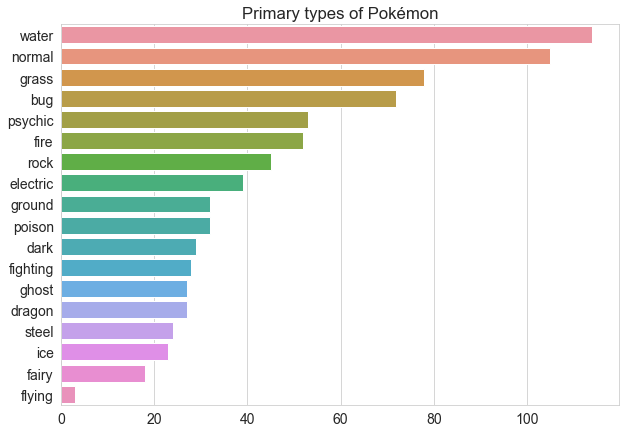

In [32]:
plt.figure(figsize=(10, 7))
plt.title('Primary types of Pokémon')
sns.barplot(x=type1_count.values, y=type1_count.index);

The most common primary types of Pokémon are water and normal, followed by grass and bug. The most rare primary type is flying (with 3 Pokémon only). However, this does **not** mean that flying-type Pokémon are rare, because this is *only the data for the primary type*. If many Pokémon have 'flying' as its secondary type, then it can **not** be stated that 'flying-type Pokémon are rare'. That's why it is necessary to analyze secondary types as well.

In [33]:
# import jovian
# jovian.commit(project=project_name, environment=None)

In [34]:
# Counting the number of NaN values (null values) in type2 column
pok_df.type2.isnull().value_counts()

False    417
True     384
Name: type2, dtype: int64

This means 384 Pokémon have only a primary type, but not a secondary type, and 417 Pokémon have both a primary and a secondary type.

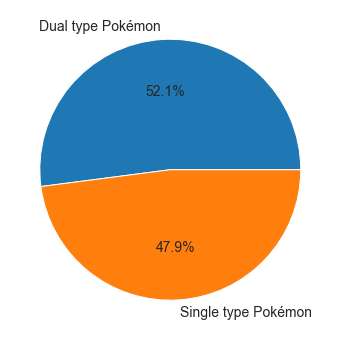

In [35]:
data_type2 = [417, 384]
labels_type2 = ['Dual type Pokémon', 'Single type Pokémon']

plt.figure(figsize=(6,6))
plt.pie(data_type2, labels=labels_type2, autopct='%1.1f%%');

This means nearly 52% of Pokémon have both a primary and a secondary type, and about 48% of Pokémon have only a primary type. This shows it is important to analyze both primary and secondary types when analyzing Pokémon types.

In [36]:
type2_count = pok_df.type2.value_counts()
type2_count

flying      95
ground      34
poison      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
dragon      17
water       17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

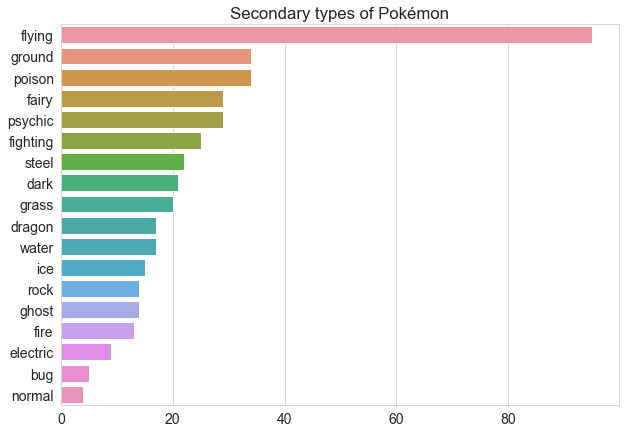

In [37]:
plt.figure(figsize=(10,7))
plt.title('Secondary types of Pokémon')
sns.barplot(x=type2_count.values, y=type2_count.index);

> As seen in the plot above, excluding the null values, **the flying-type is by far the most common secondary type, despite being the rarest primary type**. Looking only at the primary types, one might think flying-type Pokémon are really rare, **but they are not!** In fact, they are very common, it is just that the vast majority of flying-type Pokémon have 'flying' as their secondary type, not primary. 

> Similarly, if someone looks only at the secondary types, one might think bug and normal-type Pokémon are rare, but they are not, since bug and normal-types are between the most common primary types of Pokémon. 

> **This means that when analyzing the Pokémon types, it is essential to take into account both the primary and secondary types, otherwise your inferences will probably be wrong.**

In [38]:
# jovian.commit(project=project_name, environment=None)

Now that we know how the Pokémon types are distributed, I will look at the histograms of the distributions of *weight, height, percentage of males, happiness and base total* of the Pokémon. Just a reminder: the base total of a Pokémon is the sum of the base stats of a Pokémon (which includes hp, attack, defense, special attack, special defense, and speed), and can be considered a general guide to how "strong" a Pokemon is.

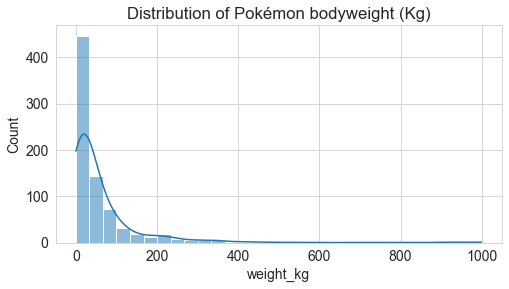

In [39]:
# Distribution of weight
plt.figure(figsize=(8,4))
plt.title('Distribution of Pokémon bodyweight (Kg)')
sns.histplot(pok_df.weight_kg, bins=30, kde=True); # compute a kernel density estimate as well

It seems most Pokémon are lightweight ("lightweight" being from 0.1 kg up to 50-60 kg), but there are a few very heavy Pokémon, up to almost one metric ton (1000 kg) of bodyweight.

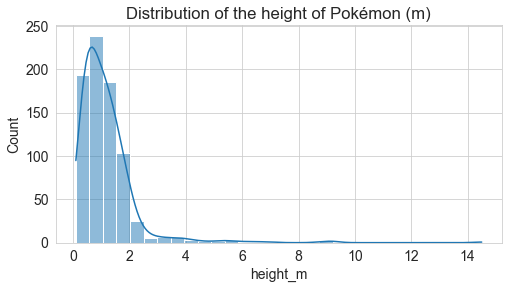

In [40]:
# Distribution of height
plt.figure(figsize=(8,4))
plt.title('Distribution of the height of Pokémon (m)')
sns.histplot(pok_df.height_m, bins=30, kde=True); # compute a kernel density estimate as well

It seems most Pokémon are between 0.1 and 2 meters tall, but there are a few very tall Pokémon, up to 14 meters.

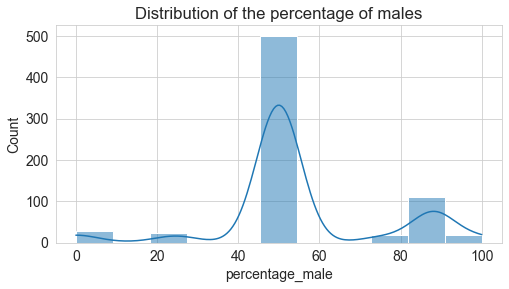

In [41]:
# Distribution of the percentage of males
plt.figure(figsize=(8,4))
plt.title('Distribution of the percentage of males')
sns.histplot(pok_df.percentage_male, kde=True); # compute a kernel density estimate as well

The vast majority of Pokémon have 50% of males in their "population" (i.e. a male-to-female ratio of 1:1). However, there are a few Pokémon with more males in their "population" (between 70 and 100% of males), and there is an even smaller number of Pokémon with a small percentage of males in the "population" (between 0 and 30% of males).

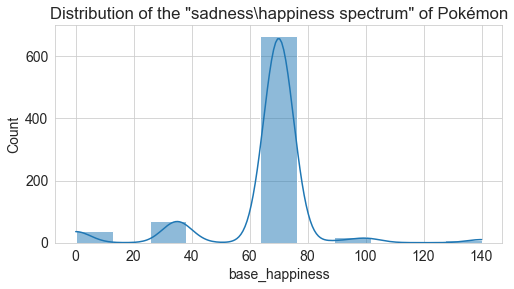

In [42]:
# Distribution of happiness
plt.figure(figsize=(8,4))
plt.title('Distribution of the "sadness\happiness spectrum" of Pokémon')
sns.histplot(pok_df.base_happiness, kde=True); # compute a kernel density estimate as well

The vast majority of Pokémon lie in the middle of the sadness / happiness spectrum, i.e. they are not very happy, but not very sad either. Unfortunately, it is possible to notice that there are more very sad Pokémon than there are  very happy Pokémon. Very happy Pokémon are rare, unfortunately.

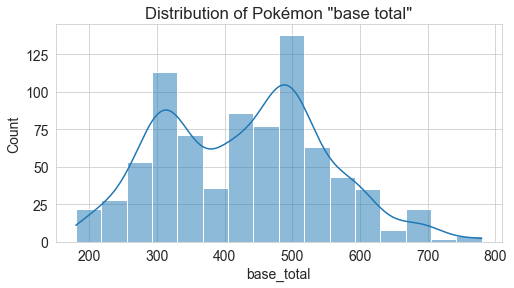

In [43]:
# Distribution of base total
plt.figure(figsize=(8,4))
plt.title('Distribution of Pokémon "base total"')
sns.histplot(pok_df.base_total, kde=True); # compute a kernel density estimate as well

> The base total of a Pokémon consists of the sum of its base stats, which includes hp, attack, defense, special attack, special defense, and speed. It can be considered a general guide to how strong a Pokemon is. Obviously, the higher the total of the Pokémon, the stronger the Pokémon tends to be. This graph above shows an interesting pattern. First off, the majority of the values are on the middle-left side of the graph, and few values on the right side of the graph. That means that Pokémon with lower base totals are more common than Pokémon with higher base totals (in general). 

> But the most interesting and curious thing about this distribution is that **it does not have a single peak, but two peaks**. One peak at roughly 300, and another peak (higher than the first one) at roughly 500. **This distribution with two peaks is called a [bimodal distribution](https://www.statisticshowto.com/what-is-a-bimodal-distribution/)**. The bimodal distribution generally indicates that there are two distinct groups in your data.

In [44]:
# jovian.commit(project=project_name, environment=None)

And to finish this section of exploratory data analysis and visualization, I will find out **what percentage of Pokémon are legendary**. According to [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Main_Page), _"Legendary Pokémon are a group of incredibly rare and often very powerful Pokémon, generally featured prominently in the legends and myths of the Pokémon world."_ (Source: [Bulbapedia - Legendary Pokémon](https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon)). I will create a pie chart to better illustrate this percentage.

In [45]:
pok_df.is_legendary.value_counts()

False    731
True      70
Name: is_legendary, dtype: int64

In [46]:
(70/801)*100

8.739076154806492

Only 70 out of a total of 801 Pokémon are legendary. This is approximately 8.74%.

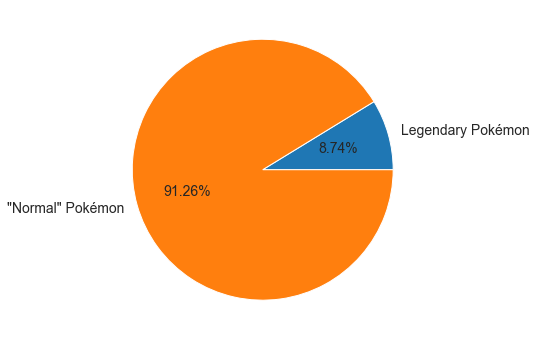

In [47]:
plt.figure(figsize=(6,6));
plt.pie([70, 731], labels=['Legendary Pokémon', '"Normal" Pokémon'], autopct='%1.2f%%');

It is true that Legendary Pokémon are rare, since more than 91% of Pokémon are not legendary.

In [48]:
# jovian.commit(project=project_name, environment=None)

# Asking and Answering Questions
In this section, I will ask 5 interesting questions about the Pokémon dataset and answer them using data analysis and visualization. Some informations and insights from the previous section will be useful here to ask the right questions.

## Question 1: Which types of Pokémon are the most common overall, and which are the rarest overall? Create a stacked barplot with the distributions of both the primary and secondary types of Pokémon.

In the previous section, I explored the most common and rarest types of Pokémon separately for the primary and secondary types. But the distributions of primary and secondary Pokémon types are very different from each other. And more than half of Pokémon are dual type (i.e. have both primary and secondary types). So it makes sense to analyse the overall distribution of Pokémon types, considering both the primary and secondary types. But it is also interesting to compare the proportions of primary and secondary types in each category, so a stacked barplot would be very useful to visualize this data.

To answer this question, I will use the `type1_count` (count of primary types) and `type2_count` (count of secondary types) variables that I have defined in the previous section. I will order these series into the same order using the `sort_index` function (to sort by the index). Then, I will do a element-wise sum of the values of these two series and create a new series with the total number of Pokémon types. And finally I will create a stacked barplot with the distribution of both the primary and secondary types, ordered by the total number of Pokémon types (primary + secondary), in descending order.

Here are the two variables with the count of Pokémon types (note they are **not** ordered by index, but rather by values in descending order):

In [49]:
type1_count

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [50]:
type2_count

flying      95
ground      34
poison      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
dragon      17
water       17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

Now I will order these two series by index using the `sort_index` function. With both series sorted by index in the same order, I will be able to make a element-wise sum of values of these 2 series (both series contains the same Pokémon types, and have the same length). 

In [51]:
len(type1_count)

18

In [52]:
len(type2_count)

18

In [53]:
# Ordering both series to alphabetical order (the parameter `ascending` defaults to `True`)
type2_count.sort_index(inplace=True)
type1_count.sort_index(inplace=True)

Now, let's take a look again at the series

In [54]:
type1_count

bug          72
dark         29
dragon       27
electric     39
fairy        18
fighting     28
fire         52
flying        3
ghost        27
grass        78
ground       32
ice          23
normal      105
poison       32
psychic      53
rock         45
steel        24
water       114
Name: type1, dtype: int64

In [55]:
type2_count

bug          5
dark        21
dragon      17
electric     9
fairy       29
fighting    25
fire        13
flying      95
ghost       14
grass       20
ground      34
ice         15
normal       4
poison      34
psychic     29
rock        14
steel       22
water       17
Name: type2, dtype: int64

Perfect. Both series are now sorted by index in alphabetical order. Now I will create a new series with the total types combined (by performing an element-wise sum of the values of both series).

In [56]:
total_types = type1_count + type2_count
total_types

bug          77
dark         50
dragon       44
electric     48
fairy        47
fighting     53
fire         65
flying       98
ghost        41
grass        98
ground       66
ice          38
normal      109
poison       66
psychic      82
rock         59
steel        46
water       131
dtype: int64

Now I will order the `total_types` series by values in descending order.

In [57]:
# Ordering this series in descending order
total_types.sort_values(ascending=False, inplace=True)

In [58]:
total_types

water       131
normal      109
flying       98
grass        98
psychic      82
bug          77
ground       66
poison       66
fire         65
rock         59
fighting     53
dark         50
electric     48
fairy        47
steel        46
dragon       44
ghost        41
ice          38
dtype: int64

> The most **common** types of Pokémon overall (considering both the primary and secondary types) are **water, normal, flying and grass**. And the **rarest** type overall is **ice**, followed by **ghost**. 

But I still need to create a graph to visualize this data, and it needs to be a stacked barplot that shows the distributions of both primary and secondary types.

I will use the indexes of the `total_types` series to reindex the `type1_count` and `type2_count` variables, using the `reindex` function. This will "sort" this two variables into the same order of the `total_types` series. I need to do this in order to create the stacked barplot with the bars in the correct order (descending order).

In [59]:
# Here, I create new varibles to store the ordered series for the stacked barplot
type1_ordered = type1_count.reindex(total_types.index)
type2_ordered = type2_count.reindex(total_types.index)

In [60]:
type1_ordered

water       114
normal      105
flying        3
grass        78
psychic      53
bug          72
ground       32
poison       32
fire         52
rock         45
fighting     28
dark         29
electric     39
fairy        18
steel        24
dragon       27
ghost        27
ice          23
Name: type1, dtype: int64

In [61]:
type2_ordered

water       17
normal       4
flying      95
grass       20
psychic     29
bug          5
ground      34
poison      34
fire        13
rock        14
fighting    25
dark        21
electric     9
fairy       29
steel       22
dragon      17
ghost       14
ice         15
Name: type2, dtype: int64

> Now that both series are in the same order and sorted in descending order (according to the `total_types` series), I can finally create a stacked barplot with both the primary and secondary types. I will use the `subplots` function to be able to plot 2 graphs in the same axis. I will add a different color for the the primary and secondary types, and I will add a legend too.

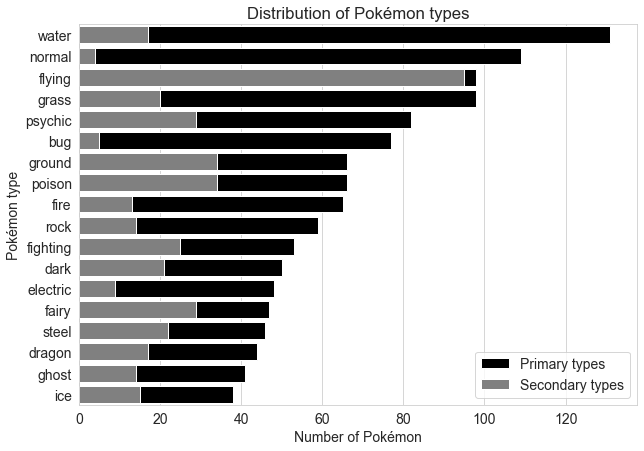

In [62]:
f, ax = plt.subplots(figsize=(10, 7))

# Values for the primary types "stacked" on top of the secondary types = total_types values
sns.barplot(y=type1_ordered.index, x=total_types.values, color='black', label='Primary types');

# Values for the secondary types
sns.barplot(y=type2_ordered.index, x=type2_ordered.values, color='gray', label='Secondary types');

# Add the legend, labels and title
ax.legend();
ax.set(xlabel='Number of Pokémon', ylabel='Pokémon type');
ax.set_title('Distribution of Pokémon types');

> Done. I have just created a horizontal barplot with the count of the primary Pokémon types (represented in the graph in black color) *stacked on top* of the count of the secondary Pokémon types (represented in gray color). **The total length of the bars represent the total number of Pokémon for each type, considering both primary and secondary types**. This graph is very useful to visualize both the overall distribution of the Pokémon types, and also the proportions of primary and secondary types in each category.

> Considering both the primary and secondary types, **the most common Pokémon types are water, normal, flying and grass. The rarest Pokémon type is ice, followed by ghost and dragon.** Another interesting information this graph shows is that *the normal and bug types are mostly primary types of Pokémon*, and that *the flying type is mostly a secondary type*.

In [63]:
# import jovian
# jovian.commit(project=project_name, environment=None)

## Question 2: Which combinations of Pokémon types are the most common?

We know from the exploratory analysis that more than half of the Pokémon are dual type (i.e. have both a primary and a secondary type). And in the previous question, it was very noticeable that the *normal type and bug type are mostly primary types* among Pokémon, while the *flying type is mostly a secondary type*. So maybe there could be a relationship between these Pokémon types (e.g. Pokémon who are both normal and flying types could have the normal type almost always as their primary type, and the flying type almost always as their secondary type).

So I need to find out which combinations of types are the most common. A heatmap will be very useful to find the answer to this question. But first I need to create a matrix with the axis as `type1` and `type2` and with the count of the Pokémon as the values. I will use the `groupby` function to group by for the primary and secondary types of Pokémon, and then use the `size` method to get the sizes of each category. Finally, I will use the `unstack` method to convert the grouped series into a matrix-like DataFrame. Credits to the line of code below to [*gurarako* from Kaggle](https://www.kaggle.com/gurarako/visualization-using-seaborn-pokemon-part-1)

In [64]:
# Here is the matrix necessary for creating the heatmap
matrix = pok_df.groupby(['type1', 'type2']).size().unstack()
matrix

type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
type1,,,,,,,,,,,,,,,,,,
bug,NaN,NaN,NaN,4.0,2.0,3.0,2.0,13.0,1.0,6.0,1.0,NaN,NaN,11.0,NaN,3.0,5.0,3.0
dark,NaN,NaN,4.0,NaN,NaN,2.0,2.0,5.0,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
dragon,NaN,NaN,NaN,1.0,NaN,2.0,1.0,4.0,NaN,NaN,4.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN
electric,NaN,NaN,NaN,1.0,2.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN
fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fighting,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,NaN
fire,NaN,1.0,1.0,NaN,NaN,6.0,1.0,6.0,NaN,NaN,2.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0
flying,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ghost,NaN,1.0,1.0,NaN,1.0,NaN,3.0,2.0,NaN,5.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN


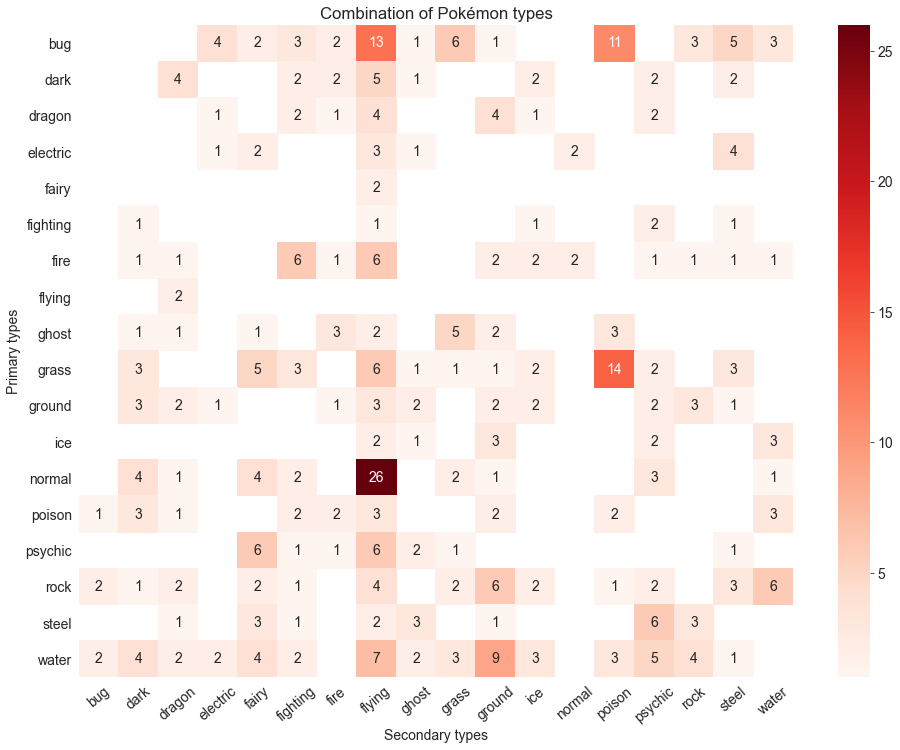

In [65]:
# Creating the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(matrix, annot=True, cmap='Reds');
plt.title('Combination of Pokémon types');
plt.ylabel('Primary types');
plt.xlabel('Secondary types');
plt.xticks(rotation=40);

Done. **The most common combination of Pokémon types is normal and flying**. This explains why normal is mostly a primary type of Pokémon and flying is mostly a secondary type of Pokémon. Many of the bird-like Pokémon have normal as its primary type and flying as its secondary type. **The second most common combination is grass and poison, and the third is bug and flying**. 

## Question 3: Which types of Pokémon are the most common among Legendary Pokémon?

Legendary Pokémon, as any other Pokémon, have a primary type, and may have a secondary type as well. But the most common types of Legendary Pokémon may be different than those described in the answer of question 1 (water, normal, flying, and grass), since Legendary Pokémon represents a very small percentage (less than 9%) of the total Pokémon. So first I will investigate the percentages of single-type and dual-type Legendary Pokémon, then I will create a stacked barplot with the distribution of Pokémon types for both primary and secondary types of Legendary Pokémon (similar to what I have done on question 1, but now considering only Legendary Pokémon).

So first I need to create a subsample of the `pok_df` dataframe, including only legendary Pokémon. To do that, I simply query inside square brackets the condition that I want to separate the data. In this case, the condition is the Pokémon being legendary, so the condition is `pok_df.is_legendary == True`. This piece of code returns a series of one boolean value for all the 801 lines of `pok_df` (with `True` if the line contains a Legendary Pokémon, and `False` if it does not). Then I only need to put this condition inside square brackets after the variable with the dataframe and assign it to a new variable to save it.

In [66]:
legendary_df = pok_df[pok_df.is_legendary == True]
legendary_df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
143,85,20480,35,580,3,Freeze Pokémon,100,1250000,1.7,90,...,NaN,144,95,125,85,ice,flying,55.4,1,True
144,90,20480,35,580,3,Electric Pokémon,85,1250000,1.6,90,...,NaN,145,125,90,100,electric,flying,52.6,1,True
145,100,20480,35,580,3,Flame Pokémon,90,1250000,2.0,90,...,NaN,146,125,85,90,fire,flying,60.0,1,True
149,150,30720,0,780,3,Genetic Pokémon,70,1250000,2.0,106,...,NaN,150,194,120,140,psychic,NaN,122.0,1,True
150,100,30720,100,600,45,New Species Pokémon,100,1059860,0.4,100,...,NaN,151,100,100,100,psychic,NaN,4.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,...,NaN,797,107,101,61,steel,flying,999.9,7,True
797,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,...,NaN,798,59,31,109,grass,steel,0.1,7,True
798,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,...,NaN,799,97,53,43,dark,dragon,888.0,7,True
799,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,...,NaN,800,127,89,79,psychic,NaN,230.0,7,True


In order to identify the `NaN` (null values) in the `type2` column, I will use the `isnull` function, and to count how many null and non-null values there are, I will use the `value_counts` function.

In [67]:
legendary_df.type2.isnull().value_counts()

False    45
True     25
Name: type2, dtype: int64

In [68]:
(25 / 70) * 100

35.714285714285715

So 25 out of a total of 70 Legendary Pokémon do not have a secondary type (i.e. are single type Pokémon). This is roughly 35.7%.

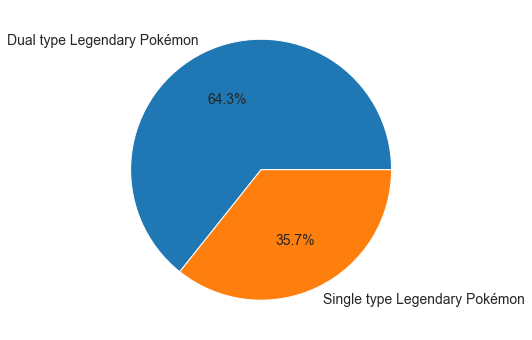

In [69]:
# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie([45, 25],
        labels=['Dual type Legendary Pokémon', 'Single type Legendary Pokémon'],
        autopct='%1.1f%%');

More than 64% of Legendary Pokémon are dual type. This shows it is important to consider both primary types and secondary types when analysing which types are the most common overall.

Now I will start to prepare the data that will be used to create the stacked barplot. I will use the `group_by` function to group by the columns of Pokémon types, and use the method `size` to count how many Pokémon are in each type category. Then I will save the result to new variables.

In [70]:
leg_type1 = legendary_df.groupby('type1').size()
leg_type1

type1
bug          3
dark         3
dragon       7
electric     5
fairy        1
fire         5
flying       1
ghost        1
grass        4
ground       2
ice          2
normal       3
psychic     17
rock         4
steel        6
water        6
dtype: int64

In [71]:
leg_type2 = legendary_df.groupby('type2').size()
leg_type2

type2
dragon       4
electric     1
fairy        6
fighting     6
fire         2
flying      10
ghost        2
grass        2
ground       1
ice          1
poison       1
psychic      4
steel        4
water        1
dtype: int64

In [72]:
len(leg_type1)

16

In [73]:
len(leg_type2)

14

The problem is that these 2 series do not have the same length (the same number of rows). This means that some types present in `leg_type1` are not present in `leg_type2`, and the opposite is also true (some types present in `leg_type2` are not present in `leg_type1`).

In [74]:
leg_type1.index

Index(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fire', 'flying', 'ghost',
       'grass', 'ground', 'ice', 'normal', 'psychic', 'rock', 'steel',
       'water'],
      dtype='object', name='type1')

In [75]:
leg_type2.index

Index(['dragon', 'electric', 'fairy', 'fighting', 'fire', 'flying', 'ghost',
       'grass', 'ground', 'ice', 'poison', 'psychic', 'steel', 'water'],
      dtype='object', name='type2')

`leg_type2` lacks bug, dark, normal and rock Pokémon types, while `leg_type1` lacks fighting and poison types. I need to add these types to the series as new rows with a value of `0`, together with their indexes. I will use the `Series` function to create new series of values with indexes, and the method `append` to concatenate the new series to `leg_type1` and `leg_type2`. The first argument passed to the `Series` function is the list with the values, and the second argument is the list with the indexes of corresponding values.

In [76]:
add_leg_type1 = pd.Series([0, 0], ['fighting', 'poison'])
add_leg_type1

fighting    0
poison      0
dtype: int64

In [77]:
add_leg_type2 = pd.Series([0]*4, ['bug', 'dark', 'normal', 'rock'])
add_leg_type2

bug       0
dark      0
normal    0
rock      0
dtype: int64

The new series were created. Now I will append them to `leg_type1` and `leg_type2` using the `append` method.

In [78]:
leg_type1 = leg_type1.append(add_leg_type1)
leg_type1

bug          3
dark         3
dragon       7
electric     5
fairy        1
fire         5
flying       1
ghost        1
grass        4
ground       2
ice          2
normal       3
psychic     17
rock         4
steel        6
water        6
fighting     0
poison       0
dtype: int64

In [79]:
leg_type2 = leg_type2.append(add_leg_type2)
leg_type2

dragon       4
electric     1
fairy        6
fighting     6
fire         2
flying      10
ghost        2
grass        2
ground       1
ice          1
poison       1
psychic      4
steel        4
water        1
bug          0
dark         0
normal       0
rock         0
dtype: int64

In [80]:
len(leg_type1)

18

In [81]:
len(leg_type2)

18

Done. Both series now have the same length and the same Pokémon types. Now I will sort these two series in alphabetical order using the function `sort_index`.

In [82]:
leg_type1.sort_index(inplace=True)
leg_type2.sort_index(inplace=True)

In [83]:
leg_type1

bug          3
dark         3
dragon       7
electric     5
fairy        1
fighting     0
fire         5
flying       1
ghost        1
grass        4
ground       2
ice          2
normal       3
poison       0
psychic     17
rock         4
steel        6
water        6
dtype: int64

In [84]:
leg_type2

bug          0
dark         0
dragon       4
electric     1
fairy        6
fighting     6
fire         2
flying      10
ghost        2
grass        2
ground       1
ice          1
normal       0
poison       1
psychic      4
rock         0
steel        4
water        1
dtype: int64

Now I will make an element-wise sum of values of these 2 series and store the result (a new series with the totals across primary and secondary types) in a new variable. Then, I will sort this new series by values in descending order.

In [85]:
leg_total = leg_type1 + leg_type2
leg_total

bug          3
dark         3
dragon      11
electric     6
fairy        7
fighting     6
fire         7
flying      11
ghost        3
grass        6
ground       3
ice          3
normal       3
poison       1
psychic     21
rock         4
steel       10
water        7
dtype: int64

In [86]:
leg_total.sort_values(ascending=False, inplace=True)
leg_total

psychic     21
dragon      11
flying      11
steel       10
water        7
fairy        7
fire         7
fighting     6
electric     6
grass        6
rock         4
dark         3
ghost        3
ground       3
ice          3
normal       3
bug          3
poison       1
dtype: int64

> **The most common Pokémon type (considering both primary and secondary types) among Legendary Pokémon is psychic, followed by dragon and flying (which are in a tie for the second most common type), and in third place there is the steel type.** 

Now I will create a stacked barplot to better visualize this data and the proportions of primary and secondary types in each category of Pokémon types. I will create this graph with the data from `leg_type1` and `leg_type2`, but first I need to sort these 2 series in the same order of the `leg_total` series using the `reindex` function. I will pass the indexes of `leg_total` to this function. This is necessary because I want to create the stacked barplot with the total length of the bars in descending order.

In [87]:
leg_type1 = leg_type1.reindex(leg_total.index)
leg_type2 = leg_type2.reindex(leg_total.index)

In [88]:
leg_type1

psychic     17
dragon       7
flying       1
steel        6
water        6
fairy        1
fire         5
fighting     0
electric     5
grass        4
rock         4
dark         3
ghost        1
ground       2
ice          2
normal       3
bug          3
poison       0
dtype: int64

In [89]:
leg_type2

psychic      4
dragon       4
flying      10
steel        4
water        1
fairy        6
fire         2
fighting     6
electric     1
grass        2
rock         0
dark         0
ghost        2
ground       1
ice          1
normal       0
bug          0
poison       1
dtype: int64

Now I can finally create the stacked barplot. I will change the default ticks of the x axis using the parameter `xticks`, inside the function `set`. It is necessary to pass a list or array of values as the argument for the `xticks` parameter, so I used the `arange` function of the NumPy library to create an array starting from `0` up to `23` (exclusive), with a step of `2`. Look at the code cell below to see the result of that function.

In [90]:
# Create an array starting from 0 up to 23 (exclusive) with a step of 2.
np.arange(0, 23, 2)
# This is the array used to define the ticks of the x axis in the graph

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

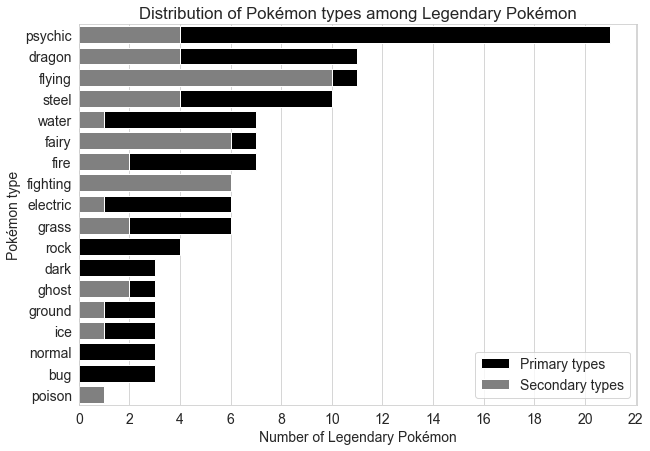

In [91]:
# Using the subplots function to plot 2 graphs in the same axis
f, ax = plt.subplots(figsize=(10, 7))

# The values for primary types stacked on top of secondary types = leg_total.values
sns.barplot(y=leg_type1.index, x=leg_total.values, label='Primary types', color='black');

# Values for the secondary types of Legendary Pokémon
sns.barplot(y=leg_type2.index, x=leg_type2.values, label='Secondary types', color='gray');

# Setting the legend, labels and title
ax.legend();
ax.set(xlabel='Number of Legendary Pokémon', ylabel='Pokémon type',
       xticks=np.arange(0, 23, 2)); # Change ticks on x axis
ax.set_title('Distribution of Pokémon types among Legendary Pokémon');

> This graph shows the distribution of Pokémon types among Legendary Pokémon only. *The gray-colored bars represent the number of secondary Pokémon types in each category, and the black-colored bars represent the number of primary Pokémon types stacked on top of the secondary types.* **The total length of the bars represent the total number of Legendary Pokémon in each category, considering both primary and legendary types.**

> **The psychic type is by far the most common type of Legendary Pokémon overall (considering both primary and secondary types). The dragon and flying types are in a tie for the second most common type overall. And in third place, there is the steel type.** It is interesting to notice that the distribution of Pokémon types among Legendary Pokémon *differs quite a bit* comparing to distribution of Pokémon types considering all Pokémon (more than 91% of Pokémon are **not** legendary). **For example, while dragon and steel types are common among Legendary Pokémon, they are very rare among all Pokémon. And while the normal type is very common among all Pokémon, it is very rare among Legendary Pokémon. The bug and poison types are somewhat common among all Pokémon, but very rare among Legendary Pokémon.** This shows that these two groups of Pokémon (Legendary Pokémon and "normal" Pokémon) are a lot different from each other when it comes to distribution of Pokémon types.

In [92]:
# import jovian
# jovian.commit(project=project_name, environment=None)

## Question 4: Are Legendary Pokémon "stronger" than "normal" Pokémon?

Although there is no direct measure of raw strength in this Pokémon database, **I will consider here that "strong" Pokémon are Pokémon with a high base total**. The base total of a Pokémon consists of the sum of its base stats (which includes hp, attack, defense, special attack, special defense, and speed), and can be considered a general guideline to determine how "strong" a Pokémon is. *So, for now on, when I refer to "stronger Pokémon" I mean: "Pokémon with a higher base total"*. To answer this question, I will need to compare the base total of Legendary Pokémon with the base total of "normal" Pokémon, and find out if the base total of Legendary Pokémon is higher in general than the base total of "normal" Pokémon.

So first, I will plot the histograms of the distributions of base totals of legendary and "normal" Pokémon and compare both distributions on the same graph. But to do that, I will need to create new variables to separate legendary and normal Pokémon.

In [93]:
legendary_df = pok_df[pok_df.is_legendary == True]
normal_df = pok_df[pok_df.is_legendary == False]

In [94]:
legendary_df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
143,85,20480,35,580,3,Freeze Pokémon,100,1250000,1.7,90,...,NaN,144,95,125,85,ice,flying,55.4,1,True
144,90,20480,35,580,3,Electric Pokémon,85,1250000,1.6,90,...,NaN,145,125,90,100,electric,flying,52.6,1,True
145,100,20480,35,580,3,Flame Pokémon,90,1250000,2.0,90,...,NaN,146,125,85,90,fire,flying,60.0,1,True
149,150,30720,0,780,3,Genetic Pokémon,70,1250000,2.0,106,...,NaN,150,194,120,140,psychic,NaN,122.0,1,True
150,100,30720,100,600,45,New Species Pokémon,100,1059860,0.4,100,...,NaN,151,100,100,100,psychic,NaN,4.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,...,NaN,797,107,101,61,steel,flying,999.9,7,True
797,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,...,NaN,798,59,31,109,grass,steel,0.1,7,True
798,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,...,NaN,799,97,53,43,dark,dragon,888.0,7,True
799,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,...,NaN,800,127,89,79,psychic,NaN,230.0,7,True


In [95]:
normal_df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,...,88.1,1,65,65,45,grass,poison,6.9,1,False
1,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,...,88.1,2,80,80,60,grass,poison,13.0,1,False
2,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,...,88.1,3,122,120,80,grass,poison,100.0,1,False
3,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,...,88.1,4,60,50,65,fire,NaN,8.5,1,False
4,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,...,88.1,5,80,65,80,fire,NaN,19.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,60,5120,70,485,70,Placid Pokémon,85,1000000,3.0,78,...,50.0,780,135,91,36,normal,dragon,185.0,7,False
780,131,6400,70,517,25,Sea Creeper Pokémon,100,1000000,3.9,70,...,NaN,781,86,90,40,ghost,grass,210.0,7,False
781,55,10240,70,300,45,Scaly Pokémon,65,1250000,0.6,45,...,50.0,782,45,45,45,dragon,NaN,29.7,7,False
782,75,10240,70,420,45,Scaly Pokémon,90,1250000,1.2,55,...,50.0,783,65,70,65,dragon,fighting,47.0,7,False


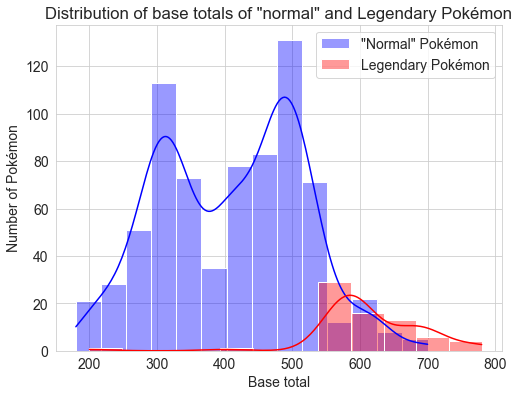

In [96]:
# Plotting the histograms of distributions of base totals
plt.figure(figsize=(8, 6))
sns.histplot(normal_df.base_total, kde=True, color='blue', alpha=0.4, label='"Normal" Pokémon');
sns.histplot(legendary_df.base_total, kde=True, color='red', alpha=0.4, label='Legendary Pokémon');
plt.legend();
plt.xlabel('Base total');
plt.ylabel('Number of Pokémon');
plt.title('Distribution of base totals of "normal" and Legendary Pokémon');

The histogram of the base total of "normal" Pokémon follows a [bimodal distribution](https://www.statisticshowto.com/what-is-a-bimodal-distribution/) and has 2 peaks, one at roughly 300, and the other at roughly 500. **The distribution of the base total of Legendary Pokémon peaks at roughly 550 - 600**. There are very few Legendary Pokémon with a low base total (< 500), but they do exist. **The maximum values of the base total of "normal" Pokémon do not seem to go higher than 700, but there are a few Legendary Pokémon with base totals that exceeds 700. This graph indicates that Legendary Pokémon, in general, tend to be "stronger" than "normal" Pokémon.**

But I feel like this is not enough to prove that Legendary Pokemon are "stronger" than normal Pokémon in general. So I will create a boxplot of Pokémon base totals for each generation, and compare Legendary *versus* "normal" Pokémon. According to Bulbapedia, "*a generation is a grouping of the Pokémon games that separates them based on the Pokémon they include. In each generation, a new set of Pokémon, region, moves, and Abilities that did not exist in the previous generation are released*" (Source: [Bulbapedia - Generation](https://bulbapedia.bulbagarden.net/wiki/Generation)).

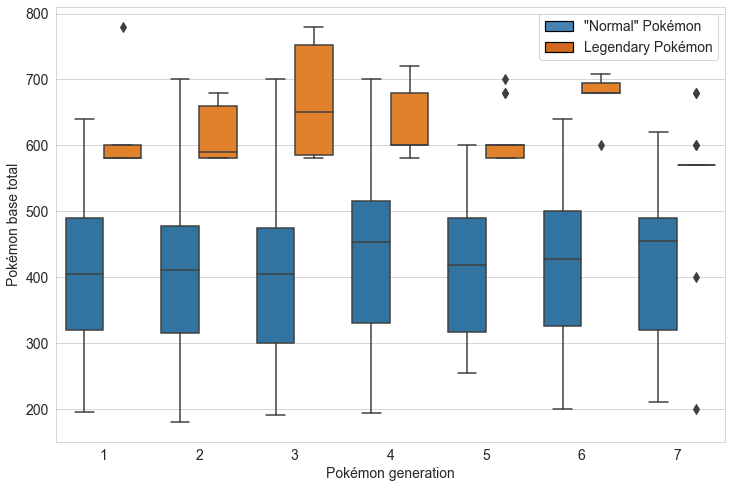

In [97]:
# This is to create the 2D artists for the legend
art_normal_pokemon = matplotlib.patches.Patch(facecolor='steelblue', edgecolor='black',
                                          label='"Normal" Pokémon', linewidth=1.2)
art_legendary_pokemon = matplotlib.patches.Patch(facecolor='chocolate', edgecolor='black',
                                             label='Legendary Pokémon', linewidth=1.2)

# Plotting the boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x=pok_df.generation, y=pok_df.base_total,
            hue=pok_df.is_legendary, fliersize=7);

# Plotting the axis labels and legend
plt.xlabel('Pokémon generation');
plt.ylabel('Pokémon base total');
plt.legend(handles=[art_normal_pokemon, art_legendary_pokemon]);

> This boxplot shows most "normal" Pokémon have a base total between 300 and 500, and there seems to be no significant differences among generations of "normal" Pokémon. Few "normal" Pokémon have a base total that exceeds 500, and even fewer have a base total that exceeds 600. But *no "normal" Pokémon exceeds 700 in its base total.*

> Among **Legendary Pokémon**, most of them have a base total that exceeds 600, and *some of them even exceed 700 in their base total*. This indicates that **Legendary Pokémon do tend to be "stronger" in general than the vast majority of "normal" Pokémon, but that is not always true for all Legendary Pokémon.** For example, in the seventh generation there are two Legendary Pokémon with low base totals (at 400 and 200 base totals).

In [98]:
# Here are informations about those two "weaker" Legendary Pokémon
legendary_df[legendary_df.base_total < 500][['name', 'classification', 'type1', 'type2', 'generation',
                                             'base_total', 'pokedex_number', 'is_legendary']]

,name,classification,type1,type2,generation,base_total,pokedex_number,is_legendary
788,Cosmog,Nebula Pokémon,psychic,NaN,7,200,789,True
789,Cosmoem,Protostar Pokémon,psychic,NaN,7,400,790,True


**In the cell below I show informations about Legendary Pokémon with a base total of over 700 (which are "stronger" than all "normal" Pokémon).**

In [99]:
legendary_df[legendary_df.base_total > 700][['name', 'classification', 'type1', 'type2', 'generation',
                                             'base_total', 'pokedex_number', 'is_legendary']]

,name,classification,type1,type2,generation,base_total,pokedex_number,is_legendary
149,Mewtwo,Genetic Pokémon,psychic,NaN,1,780,150,True
381,Kyogre,Sea Basin Pokémon,water,NaN,3,770,382,True
382,Groudon,Continent Pokémon,ground,NaN,3,770,383,True
383,Rayquaza,Sky High Pokémon,dragon,flying,3,780,384,True
492,Arceus,Alpha Pokémon,normal,NaN,4,720,493,True
717,Zygarde,Order Pokémon,dragon,ground,6,708,718,True


So only 6 out of 70 Legendary Pokémon exceed a base total of 700. These 6 Legendary Pokémon can be considered "stronger" than any "normal" Pokémon, since no "normal" Pokémon exceed a base total of 700. The output of the code cell below proves that statement (the output is a dataframe with zero rows).

In [100]:
normal_df[normal_df.base_total > 700]

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


In [101]:
# import jovian
# jovian.commit(project=project_name, environment=None)

## Question 5: Are heavier Pokémon "stronger" than lighter Pokémon in general?

In this question I will try to find if there is a positive relationship between the bodyweight and the base total of Pokémon. Once again, I am considering Pokémon with a higher base total as "stronger" Pokémon. For this analysis I will consider only non-legendary Pokémon ("normal" Pokémon). So, I will use the `normal_df` dataframe created in the previous question (which includes only "normal" Pokémon). I believe that creating a scatterplot of base total *v.s.* bodyweight would be the best way of finding the answer to this question.

In the code cell below, I define the ticks on the x axis manually (I wanted to include more ticks than the default). So I used the `xticks` function of matplotlib to manually specify the ticks on the x axis, and then I passed as the argument a numpy array starting at `0` with a step of `100`, and ending at `900`. To create this array, I used the function `arange(0, 901, 100)` from the numpy library.

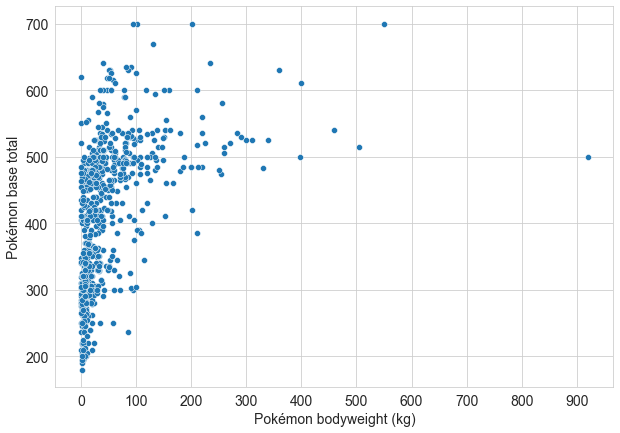

In [102]:
plt.figure(figsize=(10,7))
plt.xlabel('Pokémon bodyweight (kg)')
plt.ylabel('Pokémon base total')
plt.xticks(np.arange(0, 901, 100)) # Define the ticks on x axis
sns.scatterplot(x='weight_kg', y='base_total', data=normal_df);

There seems to be some kind of relationship between the bodyweight and base total of Pokémon, but this relationship is not perfect, and it is **not linear**. Although there seems to be some outliers, the relationship between the base total and bodyweight of Pokémon seems to follow a [logarithmic function](https://www.mathsisfun.com/sets/function-logarithmic.html) or at least something close to it (more information on logarithms: [Wikipedia: logarithm](https://en.wikipedia.org/wiki/Logarithm)). One way of finding out if that holds true for the data being analyzed is to **convert one of the axis to the logarithmic scale (log scale), and then plot the data again.** If the new graph shows a pattern of a linear relationship, then it is very likely that the data does follow a logarithmic function. So I will plot the same data again, but with the bodyweight of Pokémon converted to their [natural logarithm](https://en.wikipedia.org/wiki/Natural_logarithm). For that, I will use the function `log` from the numpy library, which returns the natural logarithms of the values passed as the argument.

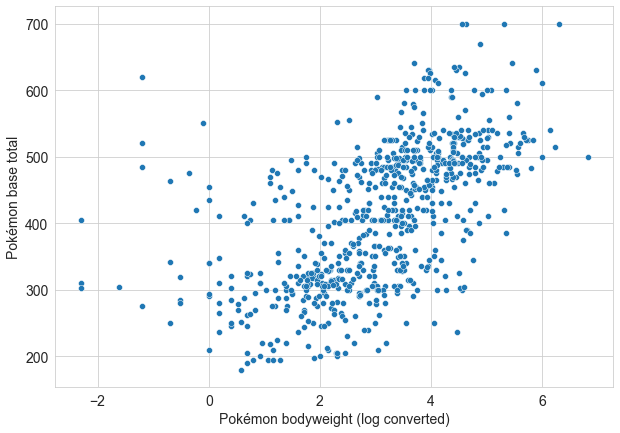

In [103]:
plt.figure(figsize=(10,7))
plt.xlabel('Pokémon bodyweight (log converted)')
plt.ylabel('Pokémon base total')
sns.scatterplot(x=np.log(normal_df.weight_kg), # x axis converted to the log scale
                y=normal_df.base_total);

There seems to be some outliers in this graph especially at the left side of the graph (most of the Pokémons with values of log-bodyweight lower than zero could be considered outliers). But in general, after converting the x axis into log scale, it is possible to visualize a linear relationship between log-bodyweight and base total (for Pokémon with a log-bodyweight higher than zero). This means that, **in general, Pokémon with heavier bodyweight tend to have a higher base total (i.e. tend to be "stronger") than Pokémon with lighter bodyweight, but this relationship is not linear, but rather logarithmic, and there are a few Pokémon that are exceptions to this rule (outliers).**

This makes sense, since most of the subsequent evolutions of each Pokémon are generally bigger, heavier, and with higher base stats (which means higher base total) than the previous evolution. So a positive relationship between base total and bodyweight was already expected for most "normal" Pokémon (non-legendary), but I found this relationship is more likely a **logarithmic function**, rather than a linear function. This means that the base total of Pokémon does **not** increase in a linear way according to its bodyweight, but rather there are *diminishing returns* of the increase in base total with the increase in bodyweight.

In [104]:
# import jovian
# jovian.commit(project=project_name, environment=None)

# Inferences and Conclusion

In this section I will make a summary of the main findings in my analysis and write a short conclusion about what I have learned during the analysis of this dataset.

> * When analysing Pokémon types, it is necessary to analyze both the primary and secondary types together, since more than half of Pokémon are dual-type, and since the distribution of Pokémon types is quite different looking separately at primary types *versus* secondary types. Therefore, any inferences about Pokémon types based only on the analysis of primary types or secondary types separately may be wrong or incomplete.

> * The most common Pokémon types overall (considering both primary and secondary types) are water, normal, flying and grass. The rarest type overall is ice, followed by ghost, dragon and steel.

> * The most common combination of Pokémon types is normal and flying (primary type and secondary type, respectively). The second most common combination is grass and poison, and the third is bug and flying.

> * Legendary Pokémon represent only roughly 8.7% of all Pokémon, and the distribution of Pokémon types among them differs quite a bit from the distribution among all Pokémon. The most common Pokémon types among Legendary Pokémon are psychic, dragon, flying and steel. The dragon and steel types, despite being common among Legendary Pokémon, are quite rare among all Pokémon.

> * Legendary Pokémon tend to have a higher base total than "normal" Pokémon in general. The base total of a Pokémon consists of the sum of its base stats (which includes hp, attack, defense, special attack, special defense, and speed), and can be considered a general guide to how "strong" a Pokémon is. That being said, not all Legendary Pokémon are "stronger" (i.e. have a higher base total) than all "normal" Pokémon. But a few Legendary Pokémon (six of them, to be precise) exceed 700 in their base total, a value of base total in which no "normal" Pokémon exceeds.

> * Among "normal" Pokémon, excluding some outliers, there seems to be a positive relationship of bodyweight and base total in general. This means that heavier Pokémon tend to have higher base totals (i.e. tend to be "stronger") than lighter Pokémon, in general. This makes sense because the subsequent evolution of a Pokémon tends to have higher bodyweight and higher base total than the previous evolution, in general. But I found that this relationship between bodyweight and base total follows a logarithmic function, rather than a linear function. This implies that there are *diminishing returns* of the increase in base total with the increase in bodyweight of Pokémon.

Although some people may not like the idea of spending time analyzing fictional data from a video game/anime series, this project was an interesting and fun way to learn and practice important skills related to data manipulation, data analysis and data visualization using Python with many of its libraries, like NumPy, Pandas, Matplotlib and Seaborn.

In [105]:
# import jovian
# jovian.commit(project=project_name, environment=None)

# Ideas for future work and references

In this section, I will share some ideas for future work for people interested in analyzing this Pokémon dataset. I will also share some links with useful information about Pokémon, as well as the links to the Python libraries and to the documentation of some functions used during this project as well.

### Ideas for future work
> * Investigate why "normal" Pokémon have a bimodal distribution of base total. When I plotted the histogram of base total in **question 4**, I noticed that the base total follows a bimodal distribution for "normal" Pokémon, with two peaks, one at roughly 300, and the other at roughly 500. The bimodal distribution generally indicates that there are two distinct groups in your data. One idea for future work is finding out which are these two groups. That may be related to the Pokémon types.

> * Explore whether there are some types of Pokémon which are "stronger" (i.e. have a higher base total) in general than other types.

> * Explore which types of Pokémon have the highest base HP, or highest base attack, or highest base defense, or the highest base speed.

> * Compare the base totals of Legendary and "normal" Pokémon, considering only psychic, dragon and steel Pokémon types separately, for example. And see if there are significant difference of base total between "normal" and Legendary Pokémon of the same type.

> * Explore which types of Pokémon are the most susceptible to the attacks of other types (i.e. take more damage from the attacks of other Pokémon types) and which types are the least susceptible to the attacks of other types. It will be necessary to use the columns that starts with `against_` for this analysis.

### References
**About Pokémon**
* [Official Pokémon website](https://www.pokemon.com)
* [Wikipedia: Pokémon](https://en.wikipedia.org/wiki/Pok%C3%A9mon)
* [Bulbapedia website](https://bulbapedia.bulbagarden.net/wiki/Main_Page)
* [Bulbapedia: Legendary Pokémon](https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon)
* [Bulbapedia: Pokémon generation](https://bulbapedia.bulbagarden.net/wiki/Generation)
---
**Python libraries**
* [NumPy](https://numpy.org/)
* [Pandas](https://pandas.pydata.org/)
* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)
---
**Functions documentation**
* [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
* [numpy.log](https://numpy.org/doc/stable/reference/generated/numpy.log.html)
* [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
* [pandas.Series.values_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
* [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
* [pandas.Series.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html)
* [pandas.Series.sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html)
* [pandas.Series.reindex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reindex.html)
* [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)
* [pandas.Series.append](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.append.html)
* [matplotlib.pyplot.figure](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.figure.html)
* [matplotlib.pyplot.pie](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)
* [matplotlib.pyplot.xticks](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.xticks.html)
* [matplotlib.pyplot.subplots](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.subplots.html)
* [matplotlib.patches.Patch](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Patch.html)
* [matplotlib.pyplot.legend](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.legend.html)
* [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)
* [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
* [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
* [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
---
**Statistics and mathematics**
* [Statistics How To: what is a bimodal distribution](https://www.statisticshowto.com/what-is-a-bimodal-distribution/)
* [Math is fun: Logarithmic Function](https://www.mathsisfun.com/sets/function-logarithmic.html)
* [Wikipedia: Logarithm](https://en.wikipedia.org/wiki/Logarithm)
* [Wikipedia: Natural logarithm](https://en.wikipedia.org/wiki/Natural_logarithm)

In [110]:
# import jovian
# jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "wagb2b2/course-project-pokemon-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ml/wagb2b2/course-project-pokemon-data-analysis


'https://jovian.ml/wagb2b2/course-project-pokemon-data-analysis'